## **Data Set Information**

Attribute Information:
- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm
- class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

The dataset contains three classes. Each class has 50 instances.

-------------------------------------------------------------------------------------------------------------------------------

Steps in this assignment:
1. Importing dataset, create training and test splits, read in features and labels (class/species) etc.
2. Initializing the Network weights and biases (random normal distribution on start)
3. Computing forward propagation
4. Computing backpropagation
5. Updating weights and bias
6. Repeating steps 2 to 4 for n many iterations (epochs)

Several visualizations about the data were also made.


## **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Importing Dataset** 

In [2]:
#Dataset loaded.
df = pd.read_csv("iris.csv")

## **Description of Dataset** 

In [3]:
#First five rows of dataset displayed.
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Last five rows of dataset displayed.
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
#The id column in the dataset has been removed from the dataset as it is unnecessary.
df.drop('Id', axis=1, inplace=True)
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


## **Shape of Dataset**

In [6]:
df.shape

(150, 5)

## **Summary of Dataset**

In [7]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
#Checked how many unique species there are.
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
#Data distribution displayed.
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
#More information about the data. (number of data, memory usage, type)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## **Checking for Missing Values**

In [11]:
#The data was checked for missing values. 
print(df.isnull().sum())
total_null_val=df.isnull().sum().sum()
print("\nTotal number of null values:",total_null_val)
#There are no missing values.

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Total number of null values: 0


## **Statistical Calculations of Numerical Data**

In [12]:
#Statistical values were displayed for all numerical variables in the data.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


### **Visualizations**

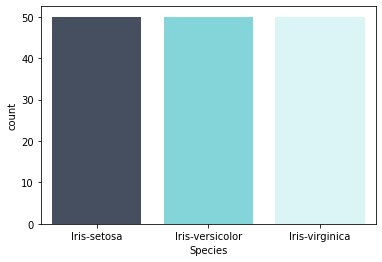

In [13]:
sns.countplot(x="Species", data=df,palette=["#424e63","#75E2E8", "#D7F9FA"])
plt.show()

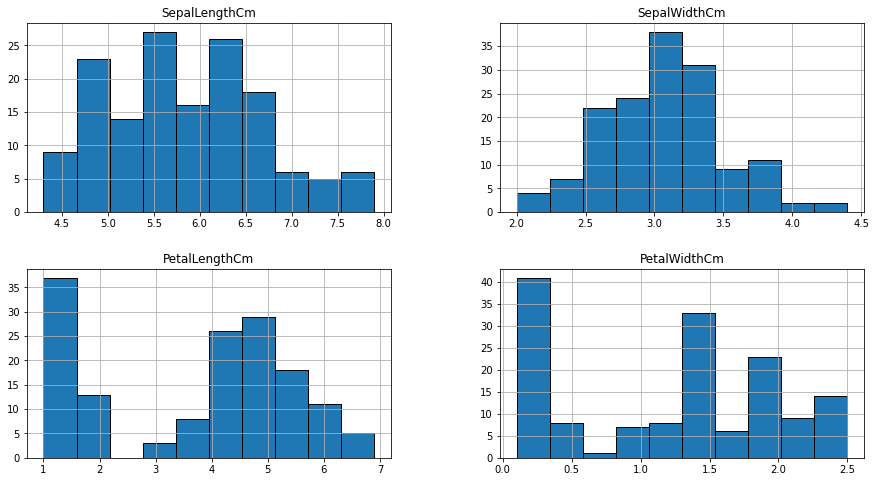

In [14]:
df.hist(bins=10,edgecolor="black", figsize=(15,8))
plt.show()

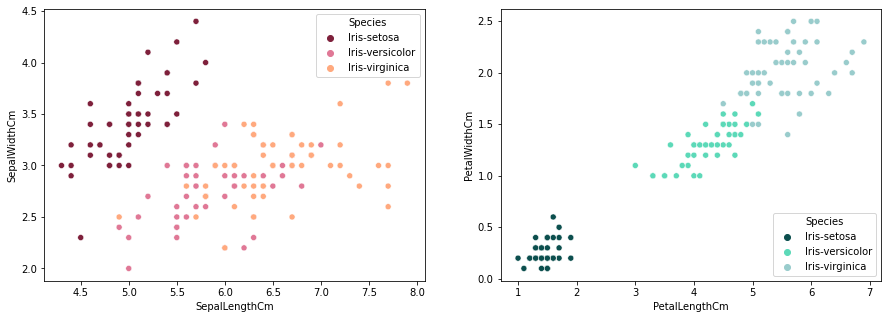

In [15]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=df,palette=["#7E203B","#E07896", "#ffa97e"])
plt.legend(loc='upper right', title='Species')


plt.subplot(1,2,2)
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", hue="Species", data=df,palette=["#0c4f4e","#5CD9B8", "#99cccc"])
plt.legend(loc='lower right', title='Species')
plt.show()


## **TRAIN TEST SPLIT**

In [16]:
from sklearn.model_selection import train_test_split
X =df.drop(["Species"], axis=1)
y=df["Species"]

In [17]:
#Categorical data is converted to 0 and 1 (dummy variable).
y= pd.get_dummies(y)

In [18]:
#The data is shuffled and split into 80% training set and 20% test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
print("Shapes of train and test sets:")
print("X train: "+str(X_train.shape))
print("X test: "+str(X_test.shape))
print("y train: "+str(y_train.shape))
print("y test: "+str(y_test.shape))

Shapes of train and test sets:
X train: (120, 4)
X test: (30, 4)
y train: (120, 3)
y test: (30, 3)


## **IMPLEMENTING A TWO LAYER NEURAL NETWORK FROM SCRATCH** 

- The simplest single-layer neural network model is called perceptron.
- It has input and output layers.

- The w value indicates the weights.
- x values indicate inputs.
- b values, on the other hand, are a constant number and are called bias.

- Neural networks are multi-layer perceptrons.

In [20]:
class NeuralNet():
    def __init__(self, layers=[4,5,3], learning_rate=0.001, iterations=130):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
        
    def init_weights(self):
        # Here the parameters are initialized. The goal is to build the neural network.
        # Parameters: weight and bias
        # Weights should not start too high or too low.
        # I initialized the weights from a random normal distribution.
        # But later these weights will change in code.
        # w = weight matrix of dimension
        # b = bias vector of dimension , constant value, affects the graph of the activation function. -for shifting left and right-
        # input dimension = D, hidden layer = H, number of classes = C;
        # In a two layer neural network 
        # W1 = First layer weights, its shape = (D,H)
        # b1 = First layer biases, its shape = (H,)
        # W2 = Second layer weights, its shape = (H,C)
        # b3 = Second layer biases, its shape = (C,)
        # The implementation of this is below.
        np.random.seed(1) #If there is an error, the same random numbers are needed every time.
        self.params["W1"]=np.random.randn(self.layers[0],self.layers[1])
        self.params["b1"]=np.random.randn(self.layers[1],)
        self.params["W2"]=np.random.randn(self.layers[1],self.layers[2])
        self.params["b2"]=np.random.randn(self.layers[2],)
           
    def relu(self,Z):
        # Rectifier Linear Unit
        # This function compares each input
        # It does not activate all neurons at the same time.
        # Returns the value 0 to neurons producing a negative result. This makes the network work faster.
        # That is, if the values are less than 0, it is 0, otherwise it is the value itself.
        # Using the Numpy library, the result was achieved with a single line of code.
        return np.maximum(0,Z)

    def softmax(self,Z):
        # normalize the output of a network to a probability distribution over predicted output classes
        # Used in multiple classification problems.
        # It is used when more than two classifications are required in the output layer.
        # Probability gets rid of negativity. It is ensured that the sum of probabilities is between 0 and 1.
        # For this, the data whose probability is calculated is divided by the total data.
        
        # There are three classes in this dataset. These are Iris-setosa, Iris-versicolor and Iris-virginica. 
        # Therefore, this function is used in the output layer.
        result =np.exp(Z)/np.sum(np.exp(Z))
        return result 
                
    def derivative_of_relu(self,Z):
        # Values less than or equal to zero take the value 0.
        # Values greater than zero are 1.
        ret = np.greater(Z, 0).astype(np.float64)
        return ret      
        
    def cross_entropy_loss(self, y, yhat): 
        # yhat = predicted value of y (softmax output)
        # y  = actual value of y 
        # It is the distance calculation between the output of the model and its true distribution.
        n = y.shape[0]
        loss=-(np.sum((y* np.log(yhat))))
        loss=loss/float(n)
        return loss
  
    def error(self, y, yhat):
        # It was written to measure how much the model deviated from the correct results.
        # For this, the actual values are subtracted from the estimated values. 
        # The absolute value of the result is taken and divided by the total number of values.
        n = y.shape[0]
        result = (np.abs(np.array(yhat) - np.array(y)))
        err= result/float(n)
        return err
                    
    def forward_propagation(self):
        # Performs the forward propagation 
        # The incoming data is called input. These are delivered to neurons.
        # The effect of these inputs on the output is determined by multiplying the inputs by the weights.
        # There are two layers in a neural network. Hidden layer and output layer. The layers are linked.
        # ReLU activation function is used for hidden layer.
        # Softmax is used for the output layer. This is because it is a multi-class operation.
        
        # In this part, it goes from input to output. For each node, the input weight is multiplied by the available value and added with bias.
        # Weights are given randomly at first. Output calculation will be made accordingly.
        # Since the input is X, it is multiplied by W1 and added by b1 while finding Z1 (Z[0]).
        # This value is linear. In order to break this structure, the obtained value is sent to the activation function. 
        # These functions normalize the inputs. A1 (A[0]) is obtained as output from the value sent to the Relu function.
        # This value will be used as input for the other layer and multiplied by W2. 
        # The value of Z2 (Z[1]) will be reached by adding the value of b2 (bias2) to the result..
        # Then, scores are obtained with softmax.
        # All of these values are saved in params. 
        # With the cross entropy loss function, the loss value is found.
        Z=[0,0]
        A=[0,0]
        Z[0] = np.dot(self.X, self.params["W1"])+self.params["b1"] #z1, pre-activision of first layer
        A[0] = self.relu(Z[0]) #a1, activision of first layer
        
        Z[1] = np.dot(A[0], self.params["W2"])+ self.params["b2"] #z2, pre-activision of second layer
        A[1] = self.softmax(Z[1]) #a2, activision of second layer
        
        
        #The found values are saved in params.
        self.params["Z1"] = Z[0]
        self.params["Z2"] = Z[1]
        self.params["A1"] = A[0]
        
        
        yhat = A[1] #scores from softmax ,a2
        loss = self.cross_entropy_loss(self.y,yhat) #loss calculation
        return yhat,loss
        
    def back_propagation(self, yhat):         # Computes the derivatives and update the weights and bias accordingly
        # In this part, the transition is made backwards. 
        # In doing so, derivatives of functions are used.
        # We do not know if the randomly assigned weight values are suitable for this model.
        # Therefore, the error between the outputs and their actual values is found.
        # This error should be minimized. For this, the parameters must be changed.
        # That is, depending on the error, the weights are changed in order to find the actual, that is, the desired output. The resulting value will be used to update W2 and b2.
        # This value and the W2 value, that is, the transpose of the weights of the second layer, are multiplied. 
        # Since matrix multiplication is done, it is necessary to get its transpose. Otherwise, an error may occur in the multiplication process.
        # Finally, this function is multiplied by the derivative of the relu function. The resulting value will be used to update W1 and b1.
        
        dl_a2=self.error(self.y, yhat) #w2
        dl_z1=np.dot(dl_a2,self.params["W2"].T) 
        dl_a1=dl_z1 * self.derivative_of_relu(self.params["A1"]) #w1

        # Parameters have been updated.
        # The learning rate is usually a value in the 0-1 range. The weights are scaled based on this value when updating. 
        self.params["W1"] =self.params["W1"]- self.learning_rate * np.dot(self.X.T,dl_a1)
        self.params["b1"] =self.params["b1"]- self.learning_rate * np.sum(dl_a1,axis=0)
        self.params["W2"] =self.params["W2"]-self.learning_rate * np.dot(self.params["A1"].T,dl_a2)
        self.params["b2"] =self.params["b2"]- self.learning_rate * np.sum(dl_a2, axis=0)
        
    def fit(self, X, y):        #  Trains the neural network using the specified data and labels
        # Training begins.
        # It takes x_train and y_train.
        # First, it does forward propagation.
        # Then, it does backpropagation.
        # This way the weights and bias are updated.
        # This is performed as many as the number of iterations. 130 has been selected.
        self.X = X
        self.y = y
        self.init_weights() #initialize weights and bias
        for i in range(self.iterations):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.loss.append(loss) #It is saved because it will be used while drawing the chart of loss.
                
    def predict(self, X):         # Makes prediction using the model on test data
        # It goes forward once. Then the largest of the outputs from softmax is selected.
        # Its index is saved.
        self.X=X
        Z=[0,0]
        A=[0,0]
        Z[0]= X.dot(self.params["W1"])+self.params["b1"] #z1
        A[0] = self.relu(Z[0]) #a1

        Z[1] = A[0].dot(self.params["W2"])+ self.params["b2"] #z2
        A[1] = self.softmax(Z[1]) #a2
        pred = A[1] #scores from softmax ,a2
        pred1=np.array(pred)
        pred1=pred1.argmax(axis=1)
        return pred1
    
    def acc(self, y, yhat):
        y=np.argmax(y,axis=1)
        # Calculates the accuracy between the predicted class label and the groundtruth class label
        # It compares the estimated values with the actual values and divides the total number of identical values by the total number of values.
        # Multiplying this value by 100 returns its accuracy.
        acc = int(sum(y == yhat) / len(y) * 100)
        return acc
    
    def plot_loss(self):
        # Plots the loss curve during training
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show() 

In [21]:
nn=NeuralNet()

In [22]:
X_train= np.array(X_train)
y_train= np.array(y_train)

In [23]:
nn.fit(X_train,y_train)

In [24]:
y_pred = nn.predict(X_test)
y_pred #predicted values

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 2, 1, 2, 0, 1, 1, 0], dtype=int64)

In [25]:
y_test = np.array(y_test)

In [26]:
print("Accuracy: %",nn.acc(y_test,y_pred))

Accuracy: % 73


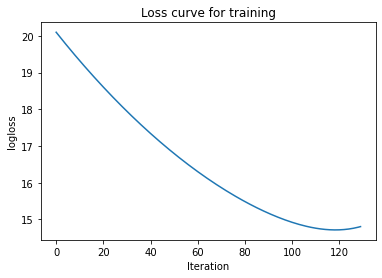

In [27]:
nn.plot_loss()